 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [105]:
# Import Libraries

import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt

%matplotlib inline

In [106]:
# Set csv paths of Portfolios and S&P 500

whale_path = Path('whale_returns.csv')
algo_path = Path('algo_returns.csv')
sp500_path = Path('sp500_history.csv')


# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [147]:
# Reading whale returns

whale_path = Path('whale_returns.csv')
whale_df = pd.read_csv(whale_path, index_col='Date', parse_dates=True).sort_index()
whale_df.head()



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [108]:
# Count nulls

whale_df.isnull().sum ()


SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [109]:
# Drop nulls

whale_df = whale_df.dropna()

# Validate no more missing values

whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [110]:
# Reading algorithmic returns

algo_path = Path('algo_returns.csv')
algo_df = pd.read_csv(algo_path, index_col='Date', parse_dates=True).sort_index()
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [111]:
# Count nulls

algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [112]:
# Drop nulls

algo_df = algo_df.dropna()

# Validate no more missing values
algo_df.isnull().sum()


Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [113]:
# Reading S&P 500 Closing Prices

sp500_path = Path('sp500_history.csv')
sp500_df = pd.read_csv(sp500_path, index_col='Date', parse_dates=True, date_format='%d-%b-%y').sort_index()
sp500_df.head()


,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [114]:
# Calculate Daily Returns 

# Reading S&P 500 Closing Prices

sp500_path = Path('sp500_history.csv')
sp500_df = pd.read_csv(sp500_path, parse_dates=True, index_col='Date', thousands=',', dtype={'Close': str}).sort_index()

# Fix Data Types

sp500_df['Close'] = sp500_df['Close'].replace('[\$,]', '', regex=True).astype(float)

# Calculate Daily Returns

sp500_daily_return = sp500_df.pct_change()

# Drop nulls

sp500_daily_return = sp500_daily_return.dropna()

# Rename `Close` Column to be specific to this portfolio. 

sp500_daily_return  =sp500_daily_return .rename(columns={'Close': 'S&P 500'})
sp500_daily_return .head()

# Display the updated DataFrame

display(sp500_daily_return.head())
display(sp500_daily_return.tail())

/var/folders/72/jrk85kms6q7_78yj5r80dnkw0000gn/T/ipykernel_4315/2570732408.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sp500_df = pd.read_csv(sp500_path, parse_dates=True, index_col='Date', thousands=',', dtype={'Close': str}).sort_index()


,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


,S&P 500
Date,
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579
2019-04-22,0.001012
2019-04-23,0.008841


## Combine Whale, Algorithmic, and S&P 500 Returns

In [115]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.

combined_df = pd.concat([whale_df, algo_df, sp500_daily_return], axis='columns', join='inner')

combined_df = combined_df.dropna()
combined_df.head()

# Rename 'Daily Returns' column to 'S&P 500'
combined_df = combined_df.rename(columns={'Daily Returns': 'S&P 500'})
combined_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Analysis

#### Calculate and Plot the daily returns.

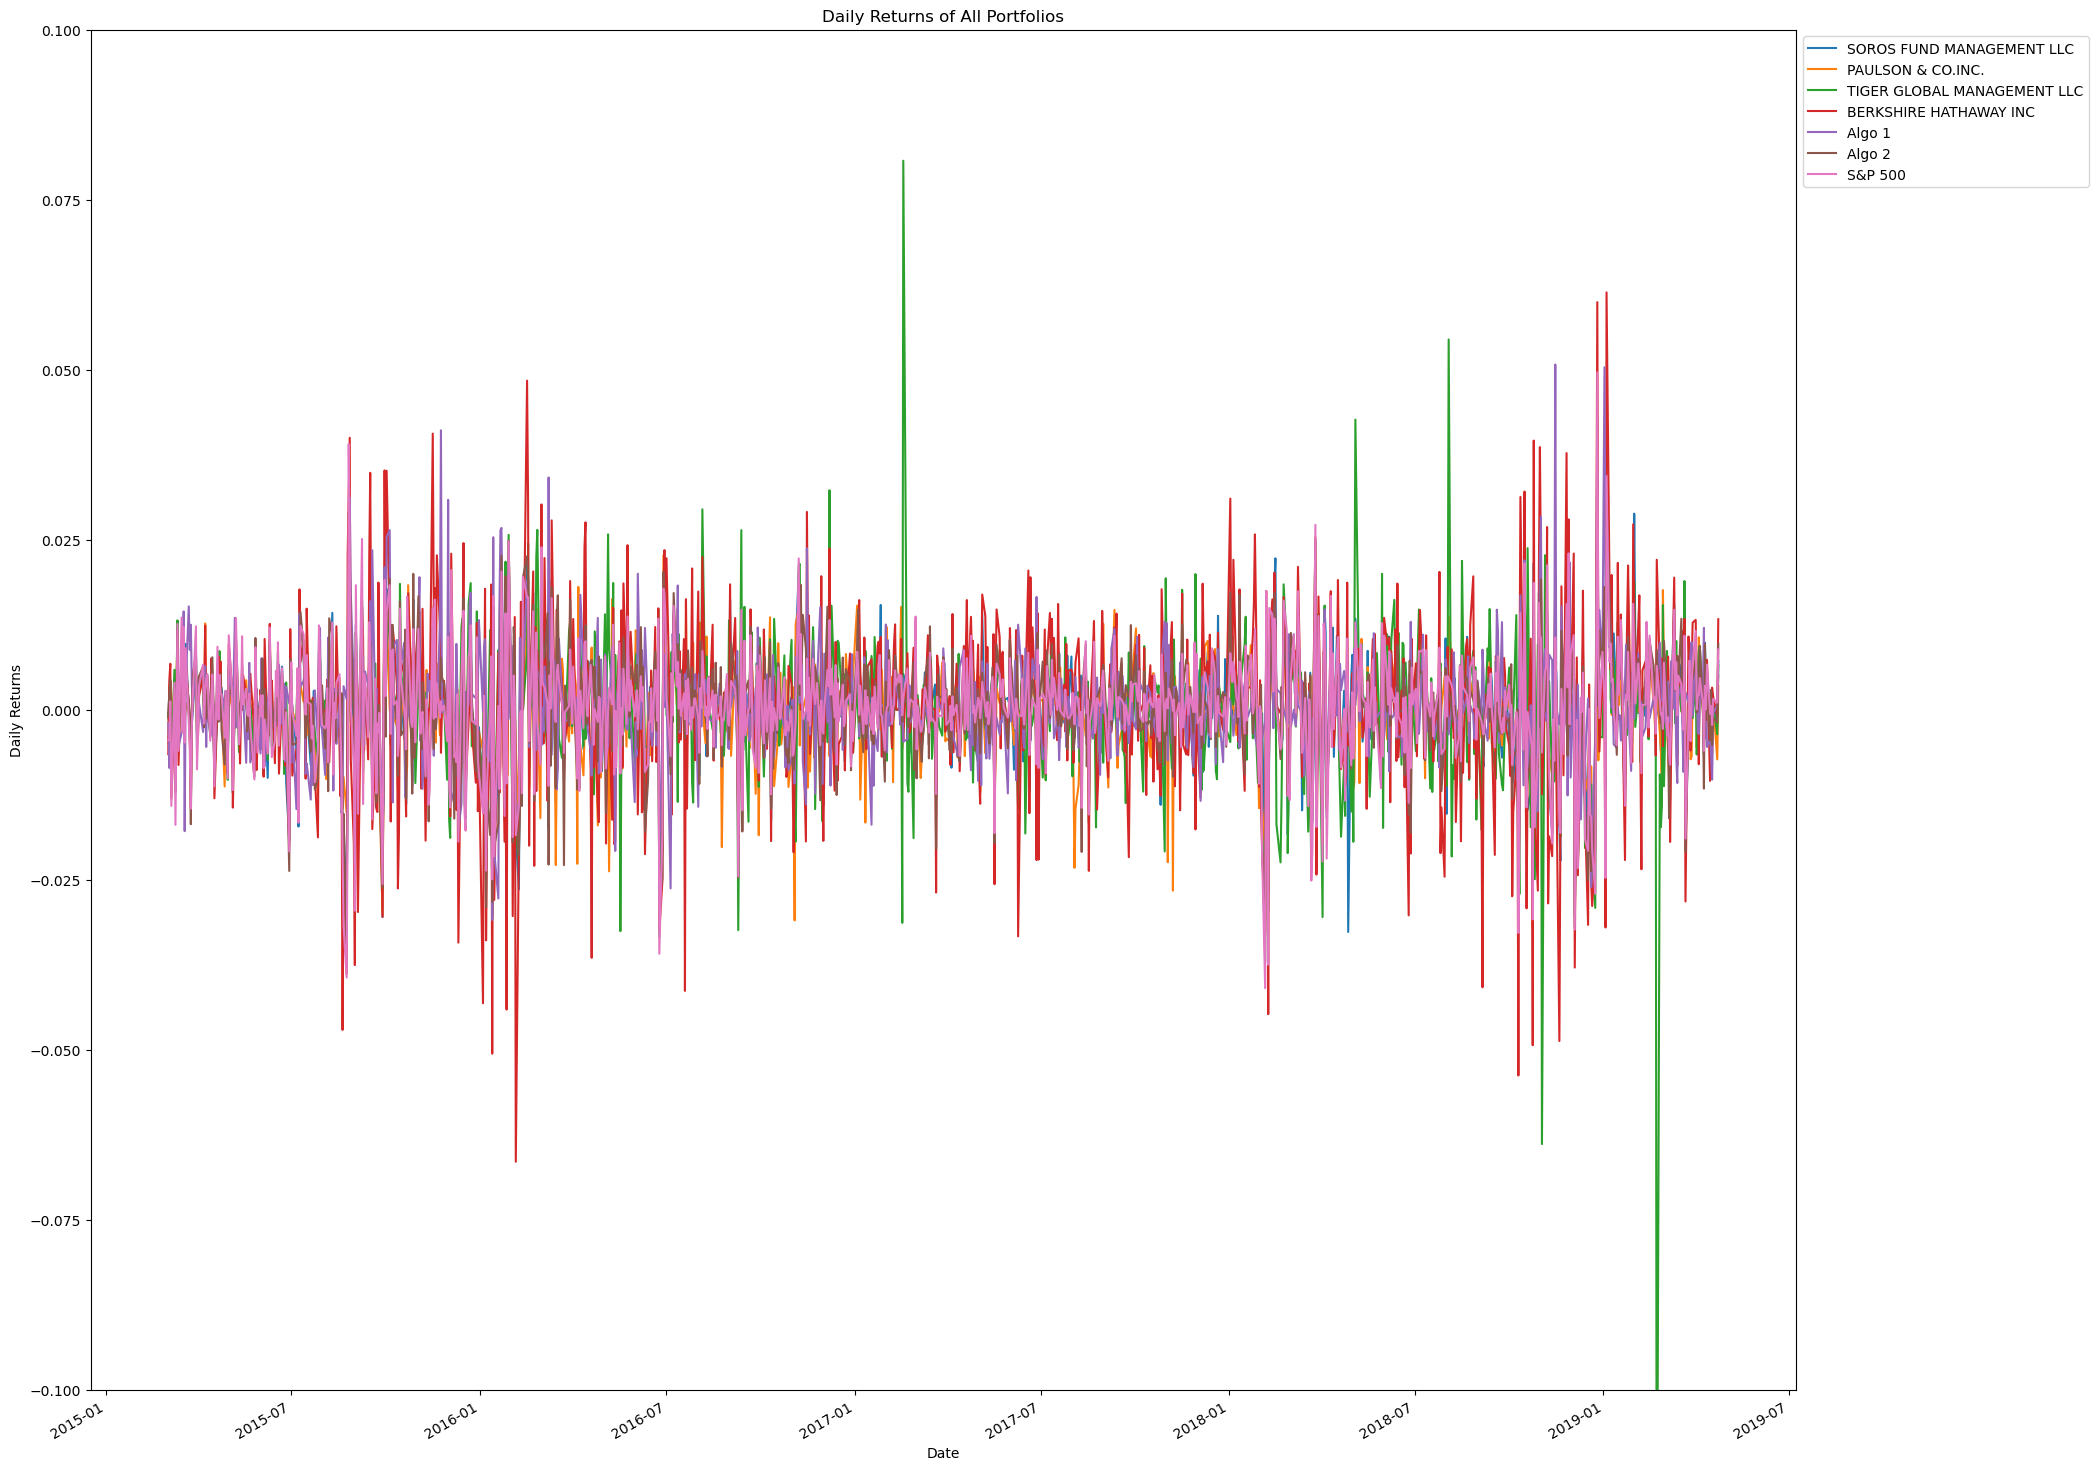

In [117]:
# Plot daily returns of all portfolios

combined_df.plot(figsize=(22, 20), title='Daily Returns of All Portfolios')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylim([-0.1, 0.1])  
plt.show()


#### Calculate and Plot cumulative returns.

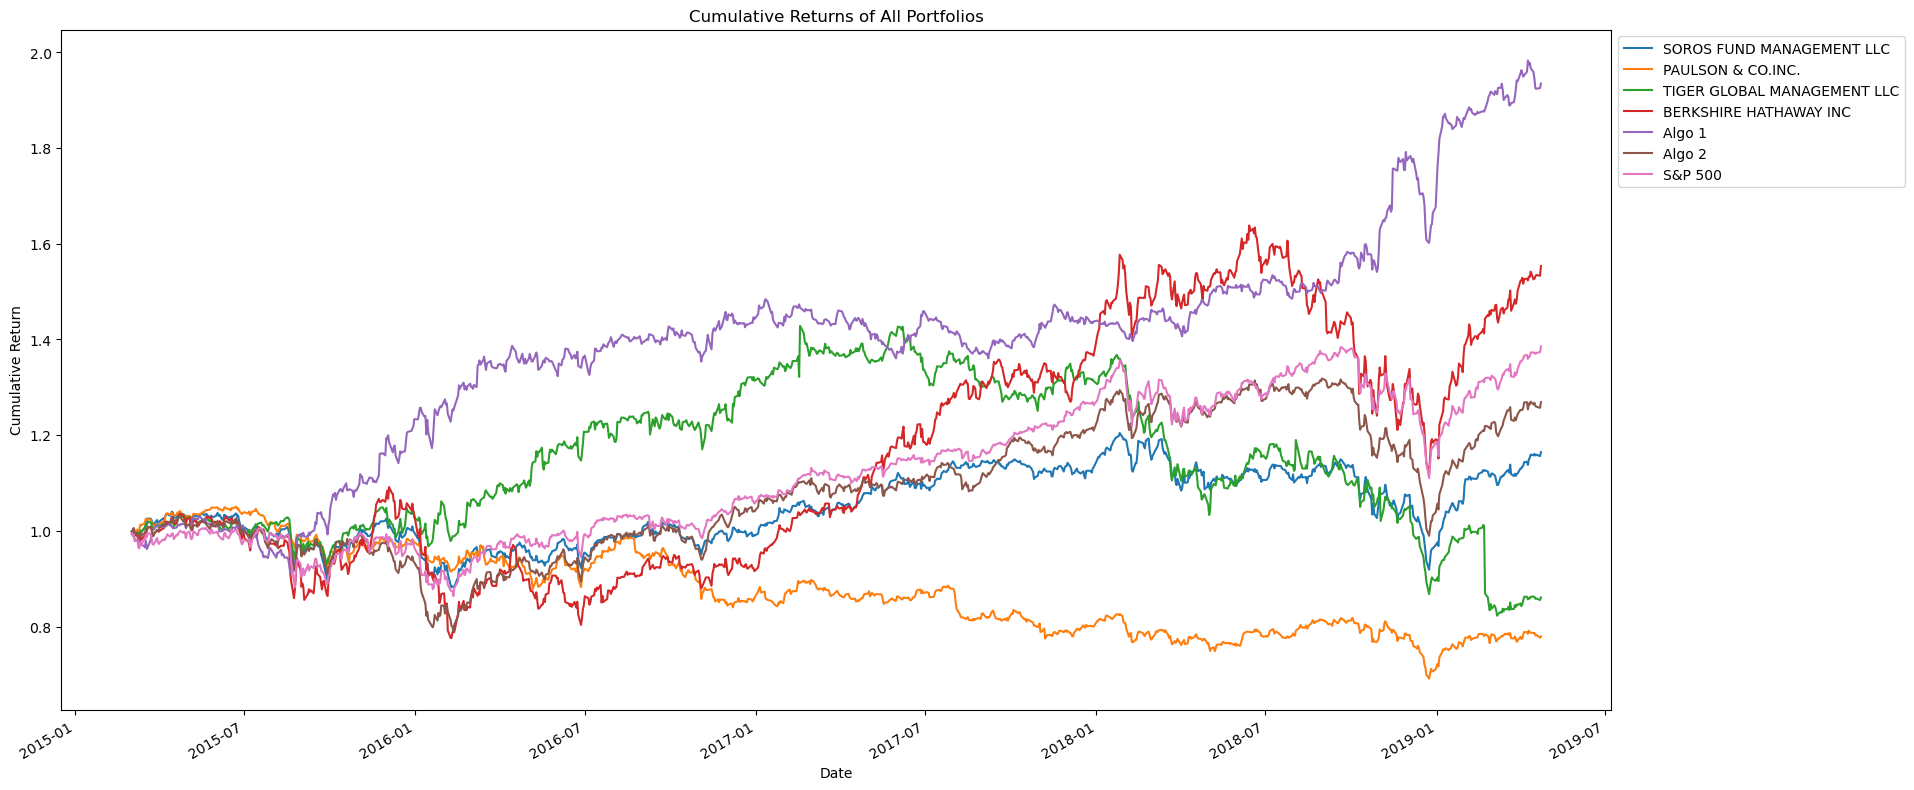

In [118]:
# Calculate cumulative returns of all portfolios

cumulative_returns = (1 + combined_df).cumprod()
cumulative_returns.head()

# Plot cumulative returns

cumulative_returns.plot(figsize=(20, 10), title='Cumulative Returns of All Portfolios')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()



---

**Analysis Cumulative returns** :'Algo 1' has a higher cumulative return, it suggests that this particular portfolio has performed relatively well in terms of overall returns compared to the other portfolios or benchmarks analyzed. 

Higher cumulative returns often come with higher risk.

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


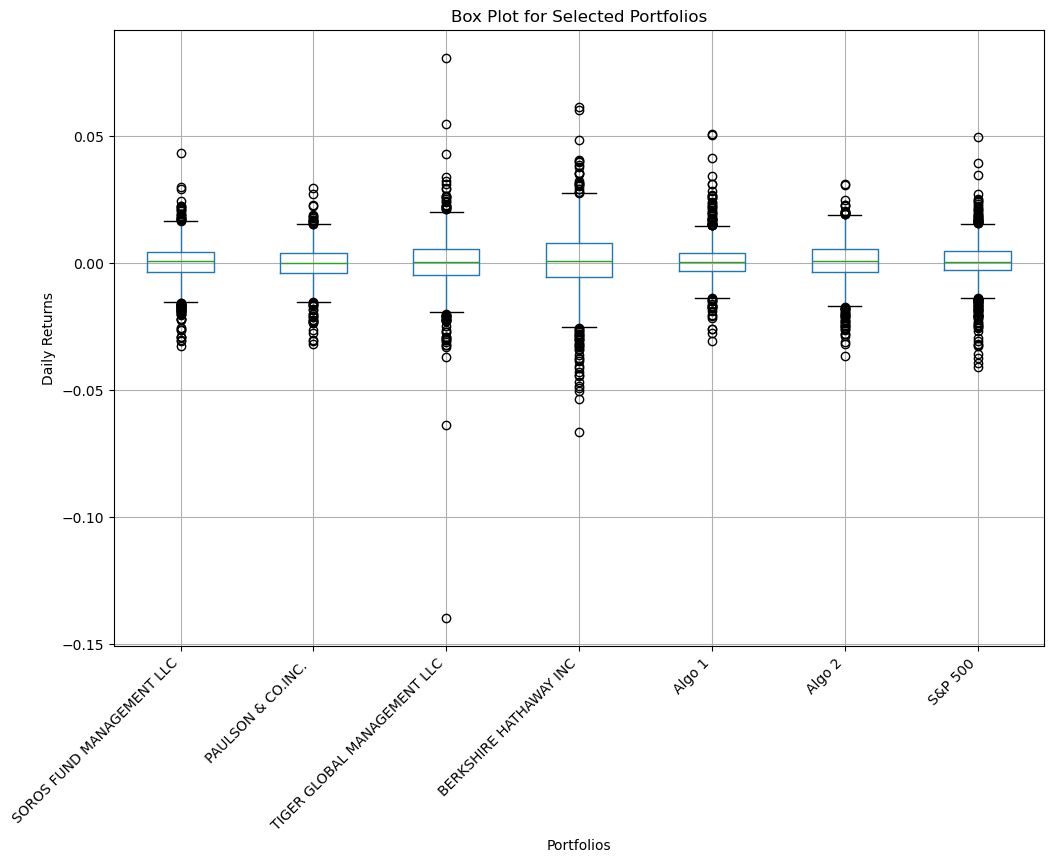

In [119]:
# Box plot to visually show risk

# Create a box plot for selected portfolios with rotated x-axis labels
selected_portfolios = ['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ', 'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1', 'Algo 2', 'S&P 500']

plt.figure(figsize=(12, 8))
combined_df[selected_portfolios].boxplot()
plt.title('Box Plot for Selected Portfolios')
plt.xlabel('Portfolios')
plt.ylabel('Daily Returns')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

plt.show()


### Calculate Standard Deviations

In [120]:
# Calculate the daily standard deviations of all portfolios

daily_std = combined_df.std().sort_values(ascending=False)
daily_std.head(7)


BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
S&P 500                        0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007620
PAULSON & CO.INC.              0.007023
dtype: float64

### Determine which portfolios are riskier than the S&P 500


In [121]:
# Calculate  the daily standard deviation of S&P 500

sp500_daily_std = sp500_daily_return.std()
sp500_daily_std.head()


S&P 500    0.008111
dtype: float64

**The portfolio with the highest standard deviation is BERKSHIRE HATHAWAY INC (0.013095), suggesting higher risk compared to S&P 500.**


### Calculate the Annualized Standard Deviation

In [122]:
# Calculate the annualized standard deviation (252 trading days)

annualized_std = daily_std * np.sqrt(252)
annualized_std.head(7)

BERKSHIRE HATHAWAY INC         0.205077
TIGER GLOBAL MANAGEMENT LLC    0.172936
S&P 500                        0.135786
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
Algo 1                         0.120967
PAULSON & CO.INC.              0.111488
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

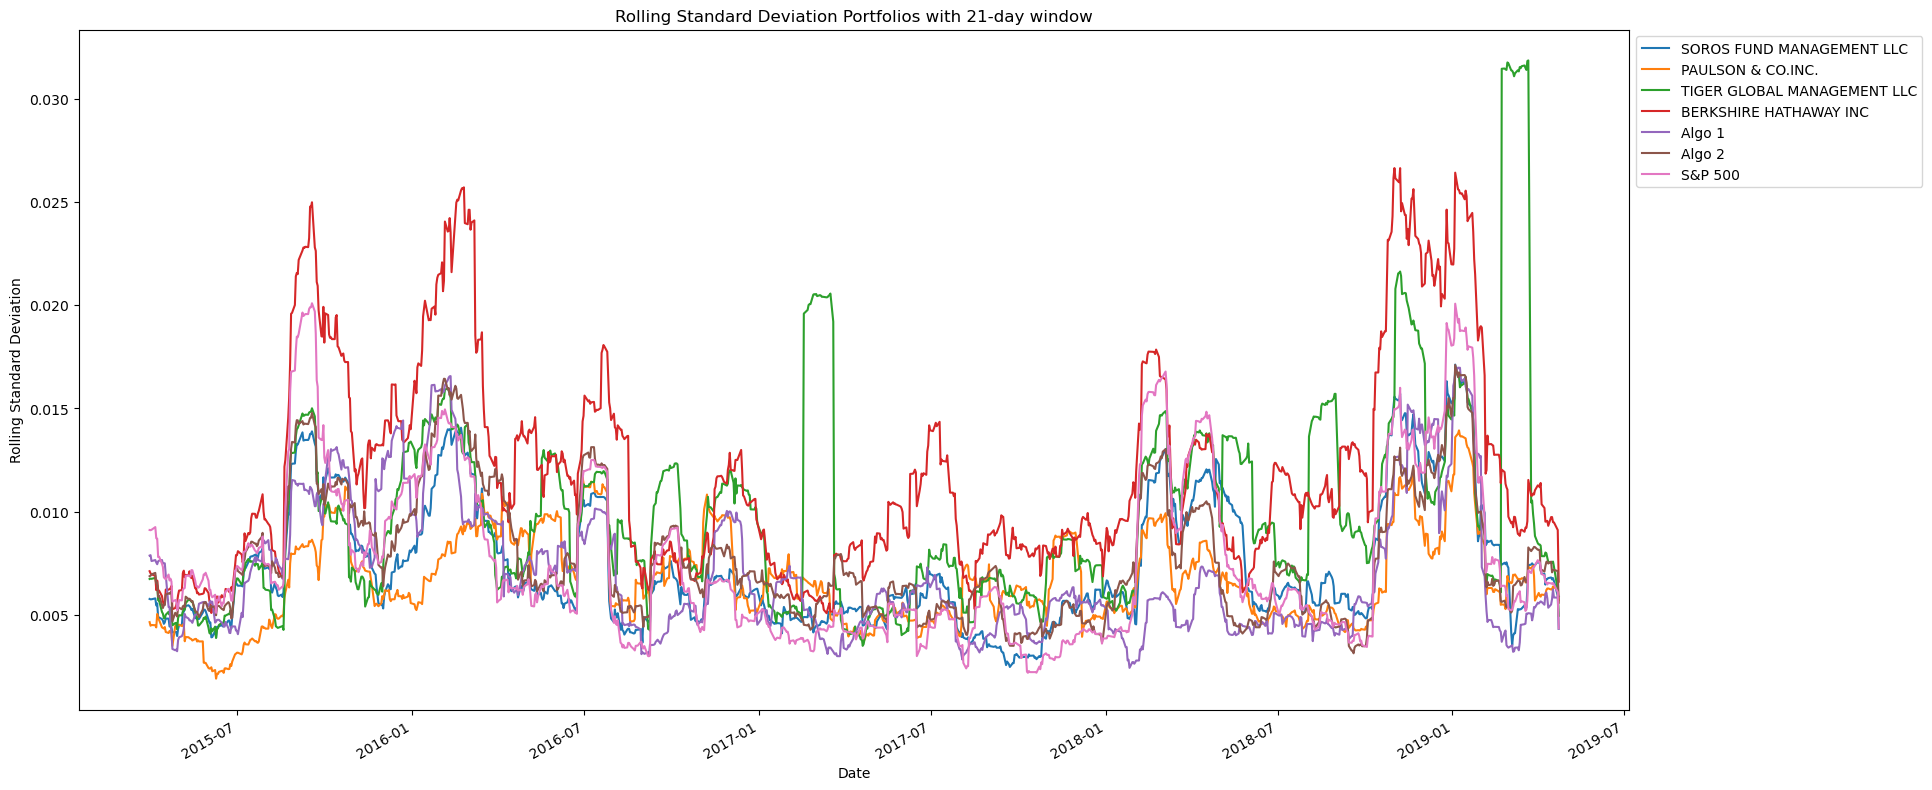

In [123]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

combined_df.rolling(window=21).std()

# Plot the rolling standard deviation
rolling_std_combined = combined_df.rolling(window=21).std()

# Plotting and customizing the plot
ax = rolling_std_combined.plot(figsize=(20, 10), title='Rolling Standard Deviation Portfolios with 21-day window')
ax.set_xlabel('Date')
ax.set_ylabel('Rolling Standard Deviation')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()


### Calculate and plot the correlation

In [182]:
# Calculate the correlation

correlation = combined_df.corr()

# Display de correlation matrix
correlation.head(7)


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [125]:
# Calculate covariance of a single portfolio

# Calculate the covariance between BRK and S&P 500
brk_daily_return = combined_df['BERKSHIRE HATHAWAY INC']
covariance_matrix = brk_daily_return.rolling(60).cov(combined_df["S&P 500"])
covariance_matrix

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-16    0.000055
2019-04-17    0.000049
2019-04-18    0.000049
2019-04-22    0.000049
2019-04-23    0.000048
Length: 1043, dtype: float64

In [126]:
 # Calculate variance of S&P 500

variance_sp500 = combined_df["S&P 500"].rolling(60).var()

print(f"Variance of S&P 500: {variance_sp500}")


Variance of S&P 500: Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-16    0.000041
2019-04-17    0.000037
2019-04-18    0.000037
2019-04-22    0.000037
2019-04-23    0.000037
Name: S&P 500, Length: 1043, dtype: float64


Beta of Berkshire Hathaway Inc. with respect to S&P 500: Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-16    1.337986
2019-04-17    1.301791
2019-04-18    1.302226
2019-04-22    1.304125
2019-04-23    1.278284
Length: 1043, dtype: float64


<Axes: xlabel='Date'>

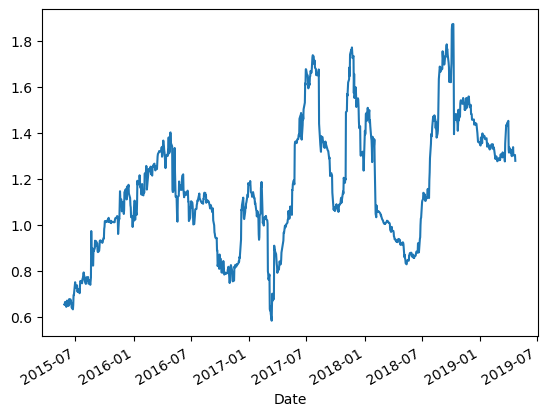

In [183]:
# Computing beta

beta = covariance_matrix / variance_sp500

print(f"Beta of Berkshire Hathaway Inc. with respect to S&P 500: {beta}")

# Plot beta

beta.plot()


**A beta greater than 1 suggests that the stock tends to have more price volatility than the market. In this case, Berkshire Hathaway Inc. is expected to be slightly more volatile than the S&P 500.**

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [128]:
# Use `ewm` to calculate the rolling window

rolling_window = combined_df.ewm(span=21).std()
rolling_window.head(7)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.000106
2015-03-05,0.002658,0.004896,0.002519,0.006934,0.004182,0.002645,0.003342
2015-03-06,0.005515,0.004592,0.004808,0.009585,0.003386,0.007399,0.006714
2015-03-09,0.004716,0.004434,0.005702,0.008103,0.002929,0.006422,0.007332
2015-03-10,0.005961,0.004742,0.007166,0.007819,0.002894,0.007478,0.008792
2015-03-11,0.005995,0.004843,0.006898,0.007045,0.003856,0.006860,0.008033


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [129]:
# Annualized Sharpe Ratios

sharpe_df = combined_df.mean() * 252 / combined_df.std() * np.sqrt(252)
sharpe_df

SOROS FUND MANAGEMENT LLC       89.817051
PAULSON & CO.INC.             -121.859610
TIGER GLOBAL MANAGEMENT LLC    -30.507024
BERKSHIRE HATHAWAY INC         156.696151
Algo 1                         347.419418
Algo 2                         126.343642
S&P 500                        163.363399
dtype: float64

<Axes: >

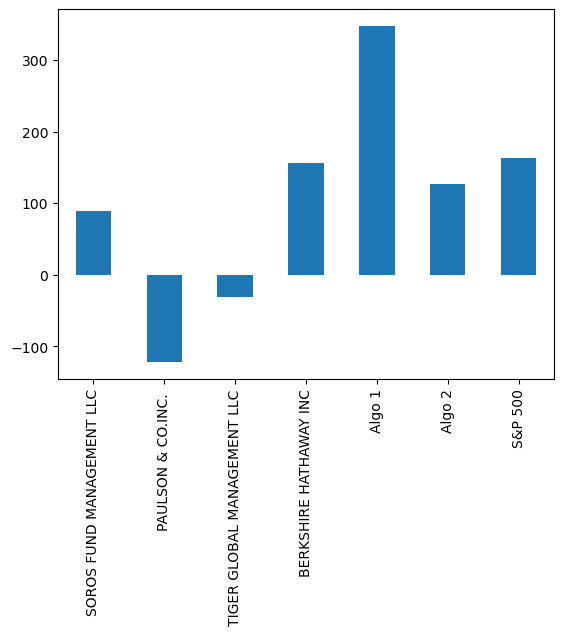

In [130]:
sharpe_df.plot.bar()

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

The analysis includes into the performance metrics of various portfolios, introducing Algorithmic strategies and a group of portfolios referred to as "Whales." This group comprises Soros Fund Management LLC, Paulson & Co. Inc., Tiger Global Management LLC, and Berkshire Hathaway Inc. A key aspect of this analysis involves the comparison of these portfolios with the S&P 500.

As we explore the performance of these portfolios, a significant observation comes to light. Specifically, the S&P 500 demonstrates a lower Sharpe ratio, a metric crucial for evaluating risk-adjusted returns. The diminished ratio for the S&P 500 suggests a lower inherent risk when contrasted with Algorithmic strategies. Investors commonly consider the Sharpe ratio as a pivotal factor in their decision-making process, influencing how they assess the risk and potential returns associated with different investment opportunities.

In essence, while Algorithmic strategies stand out for their impressive cumulative returns, investors are urged to approach this success with a measure of caution due to the concurrently higher level of associated risk. The starkly lower Sharpe ratio of the S&P 500 positions it as a relatively more conservative option, hinting at a potentially lower level of risk in comparison.

Against this backdrop, the imperative for investors is to conduct a meticulous evaluation of their risk tolerance and align their investment goals. This cautious approach becomes particularly crucial in the dynamic landscape of financial markets, where a nuanced understanding of risk and adept risk management are fundamental to shaping successful investment strategies.


-----

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [131]:
# Reading data from 1st stock

# Set csv paths
bbd_path= ('bbd_history.csv')
bbd_df = pd.read_csv(bbd_path, index_col="Date",parse_dates=True).sort_index()

# Remove 'time' from 'date'
bbd_df.index = bbd_df.index.strftime('%Y-%m-%d')

# Rename 'Close' to Ticker name

bbd_df = bbd_df.rename(columns={'Close': 'BBD'})

# Display a few rows

bbd_df.head()

,BBD
Date,
2015-03-03,4.99
2015-03-04,4.78
2015-03-05,4.71
2015-03-06,4.57
2015-03-09,4.33


In [132]:
# Reading data from 2nd stock

# Set csv paths

itub_path = Path('itub_history.csv')
itub_df = pd.read_csv(itub_path, index_col="Date", parse_dates=True).sort_index()

# Remove 'time' from 'date'
itub_df.index = itub_df.index.strftime('%Y-%m-%d')

# Rename 'Close' to Ticker name

itub_df = itub_df.rename(columns={'Close': 'ITUB'})

# Display a few rows

itub_df.head()

,ITUB
Date,
2015-03-03,5.69
2015-03-04,5.57
2015-03-05,5.40
2015-03-06,5.15
2015-03-09,4.93


In [133]:
# Reading data from 3rd stock

# Set csv paths

pbr_path = Path('pbr_history.csv')
pbr_df = pd.read_csv(pbr_path, index_col="Date", parse_dates=True).sort_index()


# Remove 'time' from 'date'
pbr_df.index = pbr_df.index.strftime('%Y-%m-%d')

# Rename 'Close' to Ticker name

pbr_df = pbr_df.rename(columns={'Close': 'PBR'})

# Display a few rows

pbr_df.head()


,PBR
Date,
2015-03-03,6.41
2015-03-04,6.18
2015-03-05,6.08
2015-03-06,5.96
2015-03-09,5.59


In [157]:
# Combine all stocks in a single DataFrame

combined_stocks_df = pd.concat([bbd_df, itub_df, pbr_df],axis='columns', join='inner')
combined_stocks_df.head()


,BBD,ITUB,PBR
Date,,,
2015-03-03,4.99,5.69,6.41
2015-03-04,4.78,5.57,6.18
2015-03-05,4.71,5.40,6.08
2015-03-06,4.57,5.15,5.96
2015-03-09,4.33,4.93,5.59


In [158]:
# Reset Date index
combined_stocks_df = combined_stocks_df.reset_index()
combined_stocks_df.dtypes


Date     object
BBD     float64
ITUB    float64
PBR     float64
dtype: object

In [159]:
# Calculate daily returns

# Convert columns to numeric

combined_stocks_df[['BBD', 'ITUB', 'PBR']] = combined_stocks_df[['BBD', 'ITUB', 'PBR']].apply(pd.to_numeric, errors='coerce')

# convert 'date' to 'date time'

combined_stocks_df['Date'] = pd.to_datetime(combined_stocks_df['Date'])

portfolio_returns = combined_stocks_df.set_index('Date').pct_change()

# Drop NAs
portfolio_returns = portfolio_returns.dropna()
portfolio_returns.head()




,BBD,ITUB,PBR
Date,,,
2015-03-04,-0.042084,-0.021090,-0.035881
2015-03-05,-0.014644,-0.030521,-0.016181
2015-03-06,-0.029724,-0.046296,-0.019737
2015-03-09,-0.052516,-0.042718,-0.062081
2015-03-10,-0.023095,-0.032454,-0.051878


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [161]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = portfolio_returns.dot(weights)

# Display sample data
portfolio_returns.name = "My Portfolio"
portfolio_returns.head()


Date
2015-03-04   -0.033018
2015-03-05   -0.020449
2015-03-06   -0.031919
2015-03-09   -0.052438
2015-03-10   -0.035809
Name: My Portfolio, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [166]:
# Join your returns DataFrame to the original returns DataFrame

portfolio_merge = pd.merge(portfolio_returns,sp500_daily_return,left_index = True, right_index = True)
portfolio_merge.head()

# Rename 'Close' to S&P 500'
portfolio_merge = portfolio_merge.rename(columns={'Close': 'S&P 500'})
portfolio_merge.head().dropna()

,My Portfolio,S&P 500
Date,,
2015-03-04,-0.033018,-0.004389
2015-03-05,-0.020449,0.001196
2015-03-06,-0.031919,-0.014174
2015-03-09,-0.052438,0.003944
2015-03-10,-0.035809,-0.016961


In [165]:
# Join combined stocks dataframes

combined_stocks_df = pd.concat([portfolio_merge,whale_df],axis='columns', join='inner')
combined_stocks_df.head()

,My Portfolio,S&P 500,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,
2015-03-04,-0.033018,-0.004389,0.002230,0.003241,-0.002534,0.004213
2015-03-05,-0.020449,0.001196,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.031919,-0.014174,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,-0.052438,0.003944,0.000582,0.004225,0.005843,-0.001652
2015-03-10,-0.035809,-0.016961,-0.010263,-0.005341,-0.012079,-0.009739


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [174]:
# Calculate the annualized `std`

#volatility = portfolio_merge.std() * np.sqrt(252)
volatility = combined_stocks_df.std() * np.sqrt(252)
volatility.sort_values(inplace=True)
volatility


PAULSON & CO.INC.              0.102654
SOROS FUND MANAGEMENT LLC      0.141277
TIGER GLOBAL MANAGEMENT LLC    0.151921
S&P 500                        0.168542
BERKSHIRE HATHAWAY INC         0.238516
My Portfolio                   0.505945
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<Axes: xlabel='Date'>

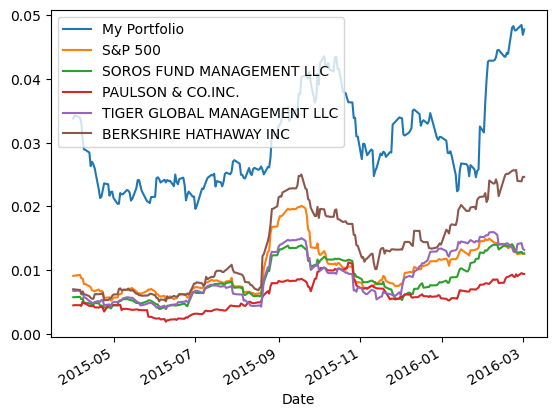

In [173]:
# Calculate rolling standard deviation

#portfolio_merge.rolling(window=21).std().plot()
combined_stocks_df.rolling(window=21).std().plot()

# Plot rolling standard deviation


### Calculate and plot the correlation

<Axes: >

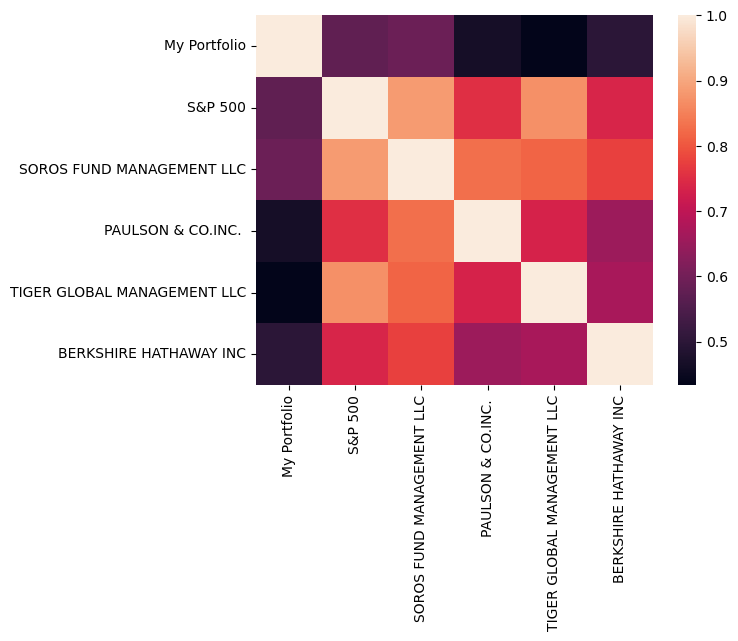

In [176]:
# Calculate and plot the correlation
import seaborn as sns
correlation = combined_stocks_df.corr()
sns.heatmap(correlation)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<Axes: title={'center': 'Rolling 60-Day Beta of Portfolios'}, xlabel='Date'>

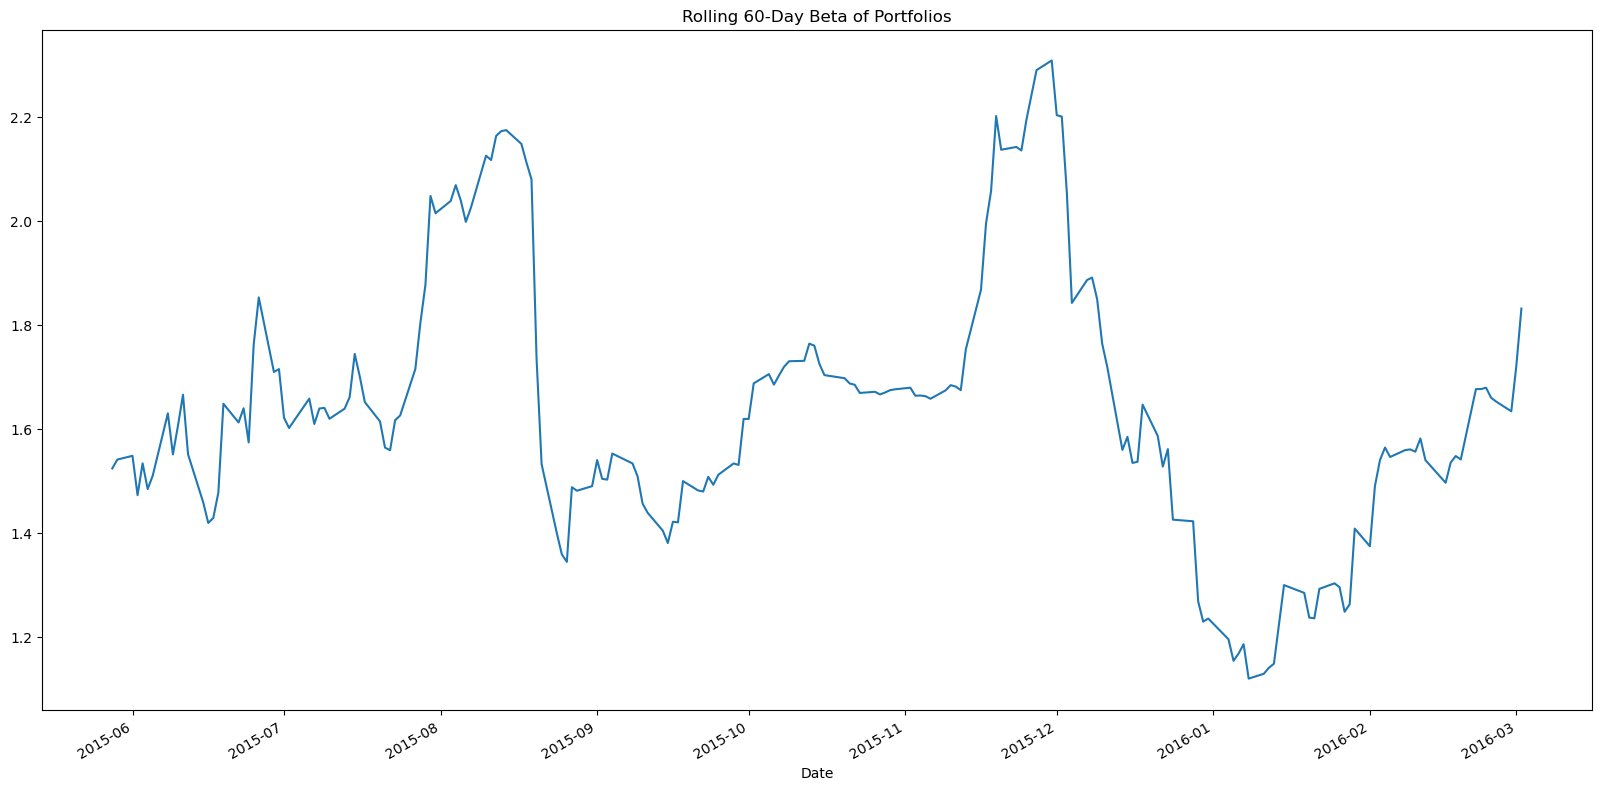

In [169]:
# Calculate and plot Beta

# Calculate rolling covariance of Porfolios vs. S&P 500 

rolling_covariance = portfolio_merge["My Portfolio"].rolling(window=60).cov(portfolio_merge['S&P 500'])

# Calculate rolling variance of Porfolios vs. S&P 500

rolling_variance = portfolio_merge['S&P 500'].rolling(window=60).var()

# Calculate 60-day rolling beta of of Porfolios vs. S&P 500 

rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Portfolios')


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [181]:
# Calculate Annualized Sharpe Ratios

#portfolio_daily_returns = portfolio_merge.pct_change()
portfolio_daily_returns = combined_stocks_df.pct_change()

average_return = combined_stocks_df.mean() * 252
annualized_std_dev = combined_stocks_df.std() * np.sqrt(252)
sharpe_ratio = average_return / annualized_std_dev
sharpe_ratio.head()



My Portfolio                  -0.712327
S&P 500                       -0.267678
SOROS FUND MANAGEMENT LLC     -0.241403
PAULSON & CO.INC.             -0.346885
TIGER GLOBAL MANAGEMENT LLC    0.489075
dtype: float64

<Axes: >

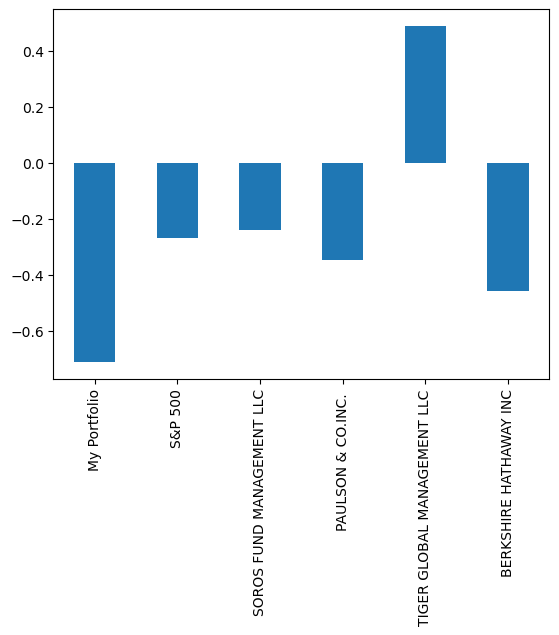

In [180]:
sharpe_ratio.plot.bar()

### How does your portfolio do?

Write your answer here!

My portfolio demonstrates a more negative Sharpe ratio (-0.712327) when compared to the S&P 500 (-0.267678). This discrepancy implies that, according to the Sharpe ratio metric, my portfolio's risk-adjusted performance is comparatively inferior to that of the S&P 500 throughout the specified period.

Upon examining the S&P 500, it becomes evident that it possesses a lower rolling standard deviation in contrast to the other portfolios. This observation suggests that the S&P 500 has showcased reduced volatility or less variability in returns when juxtaposed with my portfolio over the specified rolling time frame.

The lower rolling standard deviation implies that the S&P 500 has encountered relatively smaller fluctuations in returns compared to the other portfolios. For investors with a lower risk tolerance, portfolios characterized by lower volatility are often favored due to the stability and predictability they offer. 

Nevertheless, it's crucial to note that higher volatility, while riskier, can also present opportunities for potential higher returns for investors willing to accept a greater degree of risk.

If looking at stability and lower risk, the S&P 500 might be a more suitable option due to its lower volatility and comparatively better risk-adjusted performance.


